<a href="https://colab.research.google.com/github/Jhernandezh2/MetodosI_JulianaHernandez_MariaCamilaRamirez/blob/main/Tarea_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**DERIVACIÓN **


 Calcular el campo de velocidades cerca de la superficie de un cilindro de radioR= 2cm.Para esta tarea realizar los siguientes pasos:

 a)  Definir  una  discretización en  los  ejes x e y,  donde la  región  es: A∈[−4,4]  con 25 puntos en cada eje.

 b)  Definir la función potencial del flujo dada por:

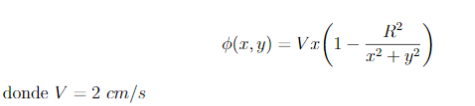

c)  Calcule  y  guarde  adecuadamente  el  campo  de  velocidades  usando  la  definici ́on  dederivada parcial central como:

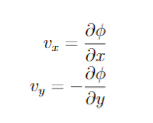

use h= 0.001.  Note que al interior del cilindro el campo de velocidades debe ser iguala cero.

d)  Dibuje el campo de velocidades usando el m ́etodo:ax.quiver(x[i],y[j],Vx[i,j],Vy[i,j]).


In [ ]:
import numpy as np
x = np.linspace(-4,4,25)
y = np.linspace(-4,4,25)
X,Y = np.meshgrid(x,y)

def potencial_de_flujo(x,y,R=2,V=2):
    r = x**2 + y**2
    distancia = np.where(r == 0, 1e-10, r)
    potencial = np.where((r > R**2),np.multiply( V * X ,(1 - (R**2) / r)), 0)
    return potencial


In [ ]:
print(potencial_de_flujo(X,Y))


[[-7.         -6.33710692 -5.68306011 -5.04       -4.41025641 -3.79620035
  -3.2        -2.62327416 -2.06666667 -1.52941176 -1.00900901 -0.50114943
   0.          0.50114943  1.00900901  1.52941176  2.06666667  2.62327416
   3.2         3.79620035  4.41025641  5.04        5.68306011  6.33710692
   7.        ]
 [-6.91320755 -6.24242424 -5.58069382 -4.93069307 -4.2954955  -3.67843137
  -3.08280255 -2.51141553 -1.96593674 -1.44615385 -0.94933333 -0.46994536
   0.          0.46994536  0.94933333  1.44615385  1.96593674  2.51141553
   3.08280255  3.67843137  4.2954955   4.93069307  5.58069382  6.24242424
   6.91320755]
 [-6.81967213 -6.1387632  -5.46666667 -4.80662983 -4.16260163 -3.53914989
  -2.94117647 -2.37333333 -1.83908046 -1.33944954 -0.87179487 -0.4290429
   0.          0.4290429   0.87179487  1.33944954  1.83908046  2.37333333
   2.94117647  3.53914989  4.16260163  4.80662983  5.46666667  6.1387632
   6.81967213]
 [-6.72       -6.02640264 -5.34069982 -4.66666667 -4.0091954  -3.3743

<ipython-input-176-99615802fe2d>:9: RuntimeWarning: divide by zero encountered in divide
  potencial = np.where((r > R**2),np.multiply( V * X ,(1 - (R**2) / r)), 0)
<ipython-input-176-99615802fe2d>:9: RuntimeWarning: invalid value encountered in multiply
  potencial = np.where((r > R**2),np.multiply( V * X ,(1 - (R**2) / r)), 0)


In [ ]:
import numpy as np

def velocidades(x,y,h = 0.001):
  potencial = potencial_de_flujo(x,y) #This calls the function with the meshgrids, generating a 2D array
  R = 2
  X,Y = np.meshgrid(x,y)
  Vx = np.zeros_like(X)
  Vy = np.zeros_like(Y)


  for i in range(25):
    for j in range(25):
        if (X[i][j]**2 + Y[i][j]**2 <= R**2):
            Vx[i][j] = 0
            Vy[i][j] = 0

        else:
            # Call the function with individual x and y values
            Vx[i][j] = (potencial_de_flujo(X[i][j] + h,Y[i][j]) - potencial_de_flujo(X[i][j]-h,Y[i][j])) / (2 * h)
            Vy[i][j] = -((potencial_de_flujo(X[i][j], Y[i][j]+h) - potencial_de_flujo(X[i][j],Y[i][j]-h)) / (2 * h))



  return Vx, Vy


In [ ]:
print(Vx)
print(Vy)

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.        ]
 [0.         1.99997234 2.03092503 2.07054472 2.11987399 2.17934121
  2.24825873 2.32425317 2.40280692 2.47720621 2.539214   2.5805909
  2.59515199 2.5805909  2.539214   2.47720621 2.40280692 2.32425317
  2.24825873 2.17934121 2.11987399 2.07054472 2.03092503 1.99997234
  0.        ]
 [0.         1.96900983 1.9999595  2.04170861 2.09631678 2.16534207
  2.24908614 2.34557095 2.44947078 2.55152245 2.63915873 2.69890141
  2.72016204 2.69890141 2.63915873 2.55152245 2.44947078 2.34557095
  2.24908614 2.16534207 2.09631678 2.04170861 1.9999595  1.96900983
  0.        ]
 [0.         1.9293821  1.95819468 1.99993827 2.05814147 2.13624711
  2.23660304 2.35878284 2.49737853 2.64005598 2.76747944 2.85685072
  2.88913587 2.85685072 2.76747944 2.64

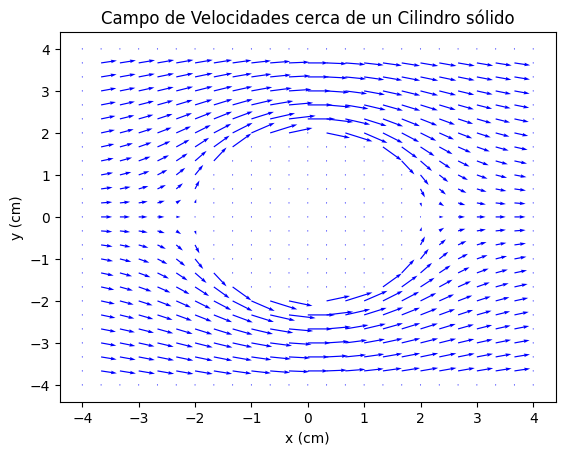

In [ ]:
import matplotlib.pyplot as plt
plt.quiver(x,y,Vx,Vy,color='blue')
plt.title('Campo de Velocidades cerca de un Cilindro sólido')
plt.xlabel('x (cm)')
plt.ylabel('y (cm)')
plt.show()
